# Logistic Regression
## Intro to Deep Learning Class

## Importing Libraries
Before we start, let's import some necessary libraries we will be using.

In [ ]:
import sklearn # Sklearn
!pip install -U scikit-learn
print("\n\nSklearn version: " + str(sklearn.__version__))



Sklearn version: 1.0.1


In [ ]:
import numpy as np # NumPy
import pandas as pd # Pandas
import matplotlib.pyplot as plt # Matplotlib
from IPython.display import display # For displaying the Pandas DataFrame
import math # Math library
from sklearn.datasets import load_breast_cancer # Import data set from sklearn
from sklearn.model_selection import train_test_split # For splitting the data set into train and test sets

## Import Data set from Sklearn
We will be using a data set on benign (harmless) and malignant (harmful) breast tumors. In this data set, we are given some information about the tumor and the corresponding diagnosis. 

In this notebook, we will use Logistic Regression to predict whether a tumor is benign or malignant (label) given information about the tumor (features).

In the following code boxes, we import the data from Sklearn.

In [ ]:
data = load_breast_cancer(return_X_y=True, as_frame=True) # Import data set from sklearn and store it in "data"

In [ ]:
X, y = data # "data" is a tuple: (X,y). This line stores the x-values in "X" and the y=values in "y".
y = pd.DataFrame({"diagnosis": y}) # Convert y to a Pandas DataFrame

# Store NumPy equivalents of the X and y variables
X_np = X.values
y_np = y.values

### Quick-Look
In the following code box, we take a quick look at both the features and the labels. Note that while the $X$ and $y$ values are Pandas Data Frames, you do not need to know about these data types for this assignment.

In [ ]:
print("X-Values (Features): ")
display(X.head())
print("\n\nY-Value (Label): ")
display(y.head())

X-Values (Features): 


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678




Y-Value (Label): 


,diagnosis
0,0
1,0
2,0
3,0
4,0


## Data set Features
Here is some information about the features and labels of our data set. This information is from [Sklearn](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset), the provider of this data.

**X-Values (Features)**
- Radius: Mean of distances from center to points on the perimeter
- Texture: Standard deviation of gray-scale values
- Perimeter
- Area
- Smoothness: Local variation in radius lengths
- Compactness: Calculated as (perimeter^2 / area - 1.0)
- Concavity: Severity of concave portions of the contour
- Concave Points: Number of concave portions of the contour
- Symmetry
- Fractal Dimension: (“coastline approximation” - 1)
- The mean, standard error, and “worst” or largest (mean of the three worst/largest values) of these features were computed for each image, resulting in 30 features. For instance, field 0 is Mean Radius, field 10 is Radius SE, field 20 is Worst Radius.

**Y-Value (Label)**
- Label: Diagnosis (Benign or Malignant)

**Additional Information**
- Number of Examples: 569
- Number of examples for Benign: 357
- Number of examples for Malignant: 212
- Features: 30

In [ ]:
m = X.shape[0]
n = X.shape[1]
print("Number of examples: " + str(m))
print("Number of features: " + str(n))

Number of examples: 569
Number of features: 30


## Data set Shape
In the last code box, we found that our data set has 569 examples and 30 features. This kind of familiarity with the data set is always nice to know before creating the Machine Learning model. 

## Separating Train and Test Sets
There are 569 examples in our data set. We will use about 80% of this data for training our Linear Regression model, and the remaining 20% of the data to evaluate our model. 

In the following code box, we split the data set into train and test sets. We will also keep NumPy array versions of the $X$ and $y$ values for training our model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# For the NumPy versions of the variables, we transpose them so that the examples are in the columns
X_train_np = X_train.values.T
X_test_np = X_test.values.T
y_train_np = y_train.values.T
y_test_np = y_test.values.T

m_train = X_train.shape[0]
m_test = X_test.shape[0]

print("Number of examples in train set: " + str(m_train))
print("Number of examples in test set:\t " + str(m_test))

Number of examples in train set: 455
Number of examples in test set:	 114


## Normalization
For Linear Regression, we must **normalize** our values. In this case, that means bringing the mean to 0 and the standard deviation to 1 using the following code box. Note that we only do this for the X-Values (Features).

In [ ]:
# X_train_np normalization
X_train_np_mean = np.mean(X_train_np, axis=0)
X_train_np_std = np.std(X_train_np, axis=0)
X_train_np_norm = (X_train_np - X_train_np_mean)/X_train_np_std

# X_test_np normalization
X_test_np_mean = np.mean(X_test_np, axis=0)
X_test_np_std = np.std(X_test_np, axis=0)
X_test_np_norm = (X_test_np - X_test_np_mean)/X_test_np_std

## Gradient Descent
Now we will move onto the Logistic Regression model. For Logistic Regression, we use Gradient Descent. These are the steps of Gradient Descent (the parameter initialization is specific to Logistic Regression, but most of these steps are applied to (mostly) all types of Machine Learning and Deep Learning algorithms): 
1. Initialize Parameters
> For Logistic Regression, we initialize all parameters to 0.
2. Hypothesis Function
> Use the paramters and input features to compute the hypothesis $\hat{y}$. 
3. Cost Function
> Use the prediction $\hat{y}$ and the real label $y$ to compute the Binary Cross Entropy (Cross Entropy) cost function.
4. Parameter Update
> Compute the parameter update for all parameters and update them using the appropriate learning rate $\alpha$ (alpha).
5. Repeat!
> Repeat Steps 2-4 many times until the cost is sufficiently low.

In the following code boxes, we will write code for each of these steps. In the end, we will put these together to train the Logistic Regression model.

### 1. Initialize Parameters
Since there are 30 features, we will have 31 parameters (weights). 

We will initialize 30 of these to 0 and store them in $W$. Remember, $W$ should be a row vector, so its shape should be $(1,30)$.

There is also 1 bias parameter which we will call $b$. We will also initialize this to 0.

Therefore, there are 31 parameters total. In the following code box, we create a function that initializes the parameters.

In [ ]:
def initialize_parameters():
  W = np.zeros((1,30))
  b = 0
  return W, b

### 2. Hypothesis Function
Recall that the hypothesis function for Logistic Regression is:
$$\hat{\textbf{Y}}=h(\textbf{X},b,\textbf{W})=\sigma(\textbf{W}\times \textbf{X} + b),$$
where $\times$ represents matrix multiplication. First, we create the sigmoid function. Mathematically, this function is:
$$\sigma(x) = \frac{1}{1+e^{-x}}.$$
In Python code, this is:
```
def sigmoid(x):
  return 1/(1+e**(-x))
```
Then, we use this function to create the hypothesis function. In Python code, the hypothesis function would be:
```
y_hat = sigmoid(np.dot(W, X) + b)
```
In the next code box, we create the sigmoid function. In the code box after that, we implement the hypothesis function.


In [ ]:
def sigmoid(x):
  return 1/(1+math.e**(-x))

In [ ]:
def hypothesis(X, b, W):
  y_hat = sigmoid(np.dot(W, X) + b)
  return y_hat

### 3. Cost Function
Now, we define the cost function using $\hat{\textbf{Y}}$ and $\textbf{Y}$. Remember, when $\hat{\textbf{Y}}$ and $\textbf{Y}$ are matrices, the cost function is defined as follows:
$$J(\textbf{X},b,\textbf{W})=-\frac{1}{m}\left[\textbf{Y}\log{\hat{\textbf{Y}}}+(1-\textbf{Y})\log{(1-\hat{\textbf{Y}})}\right],$$
where ''$-$'' and the squaring operation represent element-wise subtraction and squaring. Note that "log" is the natural log function with base $e$. In Python code, this would be:
```
J = - 1/(m) * (y*np.log(y_hat) + (1-y)*np.log(1-y_hat))
```
(Sidenote: For the Python function, instead of passing in $\textbf{X}$, $b$, and $\textbf{W}$, we will simply pass in $\hat{\textbf{Y}}$ (which we computed in the last step). Additionally, we will pass in $\textbf{Y}$ and $m$.) 

In the next code box, we create the cost function.

In [ ]:
def cost(y_hat, y, m):
  J = - 1/m * np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))
  return J

### 4. Parameter Update
After computing the cost, we have to adjust our parameters. Recall that the parameter update for $\textbf{W}$ is:
$$W:=W-\alpha\cdot \frac{dJ}{d\textbf{W}}.$$
Similarly, this is how we update $b$:
$$b:=b-\alpha\cdot \frac{dJ}{db}.$$
Additionally, here are the values for $\frac{dJ}{d\textbf{W}}$ and $\frac{dJ}{db}$:

\begin{align*}
\frac{dJ}{d\textbf{W}}&=-\frac{1}{m}\cdot \left[\frac{\textbf{Y}}{\hat{\textbf{Y}}}+\frac{1-\textbf{Y}}{1-\hat{\textbf{Y}}}\right]\cdot \hat{\textbf{Y}}\cdot (1-\hat{\textbf{Y}})\times \textbf{X}^T\\
\frac{dJ}{db}&=-\frac{1}{m}\cdot \text{sum}\left[\left(\frac{\textbf{Y}}{\hat{\textbf{Y}}}+\frac{1-\textbf{Y}}{1-\hat{\textbf{Y}}}\right)\cdot \hat{\textbf{Y}}\cdot (1-\hat{\textbf{Y}})\right]
\end{align*}

In Python code, these 4 equations would be:
```
W = W - alpha * dJdW
b = b - alpha * dJdb
dJdW = - 1/m * np.dot((y*y_hat + (1-y)*(1-y_hat)) * y_hat * (1 - y_hat), X.T)
dJdb = - 1/m * np.sum((y*y_hat + (1-y)*(1-y_hat)) * y_hat * (1 - y_hat))
```
Note that in Python, we will run the last two lines of codes first (otherwise we will get an error). In the next code box, we create a function to update our parameters. 

In [ ]:
def parameter_update(X, y_hat, y, m, alpha, W, b):
  dJdW = - 1/m * np.dot((y*y_hat + (1-y)*(1-y_hat)) * y_hat * (1 - y_hat), X.T)
  dJdb = - 1/m * np.sum((y*y_hat + (1-y)*(1-y_hat)) * y_hat * (1 - y_hat))

  W = W - alpha * dJdW
  b = b - alpha * dJdb

  return W, b

### Put it all together!
We will now do Step 5 of Gradient Descent (Repeat!) by putting all of the previous functions together into a model function. This is what we will do in this function:
1. Initialize Parameters

For as many iterations as we chose to train our model:
2. Compute Hypothesis
3. Compute Cost Function
4. Update Parameters

Finally, we return the learned parameters $\textbf{W}$ and $b$. While training the model, we will print the cost on the train set every few iterations and, along with this, the cost on the test set. We will keep track of these costs and return some values that are helpful in graphing our performance.

In the following code box, we create the model function.

In [ ]:
def model(X_train, y_train, m_train, X_test, y_test, m_test, alpha=0.1, iterations=1000):
  # Initialize Parameters
  W, b = initialize_parameters()

  # Keep track of costs for train and test sets
  iteration_nums = [] # X-value for performance graph
  costs_train = []
  costs_test = []

  # Repeat the following steps of Gradient Descent using a for-loop
  for i in range(iterations):
    # Compute Hypothesis
    y_hat = hypothesis(X_train, b, W)

    # Compute Cost Function for train set and test set and print this out
    # Only do this once every 100 iterations
    if i % 100 == 0:
      iteration_nums.append(i) # Add iteration number to list of iteration numbers
      cost_train = cost(y_hat, y_train, m_train) # Compute cost for train set
      costs_train.append(cost_train) # Add cost to list of train costs
      y_hat_test = hypothesis(X_test, b, W) # Compute hypothesis for test set
      cost_test = cost(y_hat_test, y_test, m_test) # Compute cost for test set
      costs_test.append(cost_test) # Add cost to list of test costs
      print("\n\nIteration " + str(i))
      print("Train set cost: " + str(cost_train))
      print("Test set cost: " + str(cost_test))
    
    # Update Parameters
    W, b = parameter_update(X_train, y_hat, y_train, m_train, alpha, W, b)
  
  # Print final costs for train and test sets
  iteration_nums.append(iterations) # Add iteration number to list of iteration numbers
  y_hat = hypothesis(X_train, b, W) # Compute hypothesis for train set
  cost_train = cost(y_hat, y_train, m_train) # Compute cost for train set
  costs_train.append(cost_train) # Add cost to list of train costs
  y_hat_test = hypothesis(X_test, b, W) # Compute hypothesis for test set
  cost_test = cost(y_hat_test, y_test, m_test) # Compute cost for test set
  costs_test.append(cost_test) # Add cost to list of test costs
  print("\n\n")
  print("Final train set cost: " + str(cost_train))
  print("Final test set cost: " + str(cost_test))

  # Return learned parameters
  return W, b, iteration_nums, costs_train, costs_test

## Training the Model
Finally, we get to train the Logistic Regression model. In the next code box, we run the model function with the appropriate arguments and store the learned parameters in the variables $\textbf{W}$ and $b$. Note that we feed in the NumPy version of all variables to avoid any errors.

In [ ]:
W, b, iteration_nums, costs_train, costs_test = model(X_train=X_train_np_norm, y_train=y_train_np, m_train=m_train, X_test=X_test_np_norm, y_test=y_test_np, m_test=m_test, alpha=1e-5, iterations=10000)



Iteration 0
Train set cost: 0.6931471805599453
Test set cost: 0.6931471805599453


Iteration 100
Train set cost: 0.6926168394928924
Test set cost: 0.692808856963245


Iteration 200
Train set cost: 0.6920899270448324
Test set cost: 0.6924740636550372


Iteration 300
Train set cost: 0.6915664527896891
Test set cost: 0.6921428088307883


Iteration 400
Train set cost: 0.6910464261862582
Test set cost: 0.691815100564864


Iteration 500
Train set cost: 0.6905298565771698
Test set cost: 0.6914909468095597


Iteration 600
Train set cost: 0.6900167531878579
Test set cost: 0.6911703553941437


Iteration 700
Train set cost: 0.6895071251255471
Test set cost: 0.690853334023914


Iteration 800
Train set cost: 0.6890009813782448
Test set cost: 0.6905398902792677


Iteration 900
Train set cost: 0.6884983308137522
Test set cost: 0.6902300316147812


Iteration 1000
Train set cost: 0.6879991821786817
Test set cost: 0.6899237653583078


Iteration 1100
Train set cost: 0.6875035440974908
Test set cost: 0.

## Plotting Results

Now, we plot our results to visualize how the model learned. In the following code box, we use matplotlib and the costs from the model training to create a graph with: 

$x$-axis: # of Iterations;

$y$-axis: Cost.

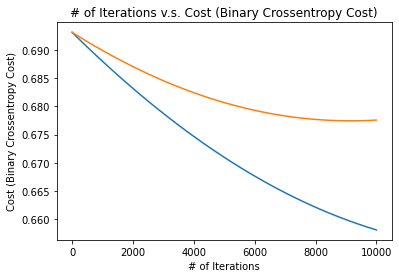

In [ ]:
plt.plot(iteration_nums, costs_train)
plt.plot(iteration_nums, costs_test)
plt.title("# of Iterations v.s. Cost (Binary Crossentropy Cost)")
plt.xlabel("# of Iterations")
plt.ylabel("Cost (Binary Crossentropy Cost)")
plt.show()

## Making Predictions
In the next code box, we make predictions for some value in the test set. We will print out the prediction along with the real value.

Feel free to play around with this code and make predictions on different examples.

In [ ]:
example_num = 10 # This is the example number. 
# Feel free to change it, but make sure that it is a non-negative number less than 114 to avoid indexing errors. 
hypothesis_example = hypothesis(X_test_np_norm[:,example_num], b, W)[0]
real_label_example = y_test_np[:,example_num][0]
print("Hypothesis: " + str(round(hypothesis_example, 3)))
print("Real Label: " + str(round(real_label_example, 3)))

Hypothesis: 1.0
Real Label: 1


It turns out that the model only predicts 7 examples wrong out of 114 total examples in the test set. That's around 94% accuracy! 

For some applications, simple linear models will be sufficient, but many times, we wish our hypothesis function to be more complex, so we turn to Neural Networks.

## Congratulations!
You have now implemented a Logistic Regression model from scratch. You should be proud of yourself!

The main takeaway from this assignment is the Gradient Descent algorithm, which has the following steps:

1. Initialize Parameters
2. Compute Hypothesis
3. Compute Cost Function
4. Update Parameters
5. Repeat!

I hope you had fun!